### Questions: 
1. How have available units for affordable housing and workforce housing changed since 2010?
    Focus for now on homeownership
    Rental costs and rental units by address may be available later
2. How do demolitions and rebuilds affect the availability of affordable housing?
    Look at permit data for demolition permits followed by construction permit for an address
    Look at change to square footage for an address
3. How have zoning changes affected the availability of affordable housing?	
    Working on getting zoning data
4. What does the shortage of affordable housing look like now? What do we expect it to look like in 2025?
    How many housing units are needed for different income groups?
    Is there a surplus or a shortfall currently?
    What do we expect 2025 to look like given the trend from 2009 to 2013 to 2017?

In [226]:
import pandas as pd

In [227]:
import os

In [228]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [229]:
os.getcwd()

'C:\\Users\\chris\\data_science_projects\\data-question-4-affordable-housing-green-dogs'

In [230]:
bp = pd.read_csv('Building_Permits_Issued.csv')

C:\Users\chris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [231]:
bp

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Const. Cost,Address,City,State,Zip,Subdivision/Lot,Contact,Permit Type,Permit Subtype,IVR Trk#,Purpose,Council Dist,Census Tract,Mapped Location
0,2018002927,Building Residential - New,Single Family Residence,081160R00100CO,01/18/2018,02/12/2018,206150.0,1017A MONROE ST,NASHVILLE,TN,37208,UNIT A 1017 MONROE,"TRISTAR CONSTRUCTION, INC",CARN,CAA01R301,3439281,to construct 1830SF single family residence wi...,19.0,37019400.0,"1017A MONROE ST\nNASHVILLE, TN 37208\n(36.1740..."
1,201617929,Building Use & Occupancy,"Tents, Stages",09215014800,04/19/2016,04/21/2016,2000.0,2300 WEST END AVE,NASHVILLE,TN,37203,N W CORNER WEST END AVE & 23RD AVE N,Music City Tents & Events Llc,CAUO,CAZ06A001,2116751,PERMIT TO ERECT 1:40X85 TENT. THIS TENT IS BEI...,21.0,37016500.0,"2300 WEST END AVE\nNASHVILLE, TN 37203\n(36.14..."
2,2016049270,Building Sign Permit,Sign - Ground / Wall Signs,11909014000,09/14/2016,09/14/2016,15000.0,2802 NOLENSVILLE PIKE,NASHVILLE,TN,37211,PT LOT 2 PATTERSON SUB,BOZMAN SIGN CO INC,CASN,CAZ02A001,3277064,to install replacement signage for existing fr...,16.0,37017300.0,"2802 NOLENSVILLE PIKE\nNASHVILLE, TN 37211\n(3..."
3,2016029907,Building Residential - Roofing / Siding,Duplex,075150A13900CO,06/20/2016,06/20/2016,17648.0,139 STONERS GLEN DR,HERMITAGE,TN,37076,UNIT 139 STONERS GLEN PHASE 1,"MR ROOF NASHVILLE, LLC",CARK,CAA02R302,3251947,Remove existing shingles and replace with new ...,12.0,37015623.0,"139 STONERS GLEN DR\nHERMITAGE, TN 37076\n(36...."
4,201533533,Building Residential - Tenant Finish Out,"Multifamily, Tri-Plex, Quad, Apartments",10404024100,08/07/2015,11/17/2015,542696.0,70 MUSIC SQ W,NASHVILLE,TN,37203,LOT 1 O.B. HAYES FIRST PLAN CONSOLIDATION OF L...,Construction Enterprises Inc,CART,CAA03R398,2061885,SEE MASTER PERMIT T2015-26520...T.....GRAND AV...,19.0,37016400.0,"70 MUSIC SQ W\nNASHVILLE, TN 37203\n(36.147074..."
5,201605753,Building Residential - Rehab,Single Family Residence,131060E32200CO,02/10/2016,02/10/2016,50000.0,322 BOXMERE PL,NASHVILLE,TN,37215,UNIT 322 BURTON HILLS VILLAGE OF BOXMERE-PHASE 1,Sharp & Robbins Construction Llc,CARR,CAA01R301,2100747,to conduct interior renovation to existing uni...,25.0,37017902.0,"322 BOXMERE PL\nNASHVILLE, TN 37215\n(36.09425..."
6,2017032777,Building Residential - New,Single Family Residence,072103B00300CO,05/17/2017,05/24/2017,226201.0,1037 FAIRWIN AVE,NASHVILLE,TN,37216,UNIT 3 2619 GALLATIN PIKE TOWNHOMES,PARAGON GROUP LLC,CARN,CAA01R301,3367050,to construct 2008Sf single family residence wi...,5.0,37011400.0,"1037 FAIRWIN AVE\nNASHVILLE, TN 37216\n(36.198..."
7,201546095,Building Residential - Rehab,Single Family Residence,12809002600,10/22/2015,10/22/2015,30000.0,305 HARPETH VALLEY RD,NASHVILLE,TN,37221,LOT 35 B. V. 1776 ESTATES,"Odyssey Construction, Llc",CARR,CAA01R301,2078541,to make general repairs to existing residence....,22.0,37018301.0,"305 HARPETH VALLEY RD\nNASHVILLE, TN 37221\n(3..."
8,201619676,Building Commercial - Roofing / Siding,"Manufacturing, Light Hazardous (H1-H5)",09314033300,04/28/2016,04/28/2016,66961.0,625 FOGG ST,NASHVILLE,TN,37203,LOTS 30 TH 34 EWING & WETMORE,Ragan Construction Co Inc (Formerly Southern R...,CACK,CAH06H000,2119017,to reroof existing cromatics building.,19.0,37019500.0,"625 FOGG ST\nNASHVILLE, TN 37203\n(36.150909, ..."
9,201550728,Building Commercial - Foundation,"Multifamily, Apt / Twnhome > 5 Unit Bldg",08305009600,11/18/2015,02/01/2016,219566.0,1035 W EASTLAND AVE,NASHVILLE,TN,37206,"LOT 4 EDGEFIELD HOSPITAL, INC. RESUB",Southland Constructors Inc.,CACF,CAA03R399,2084584,"per shell permit 201550039, to conduct foundat...",5.0,37011700.0,"1035 W EASTLAND AVE\nNASHVILLE, TN 37206\n(36...."


### 
Building Residential - New: Permit Type = CARN

Building Commercial - New: Permit Type = CACN

Residential Rehab: Permit Type = CARR

Commercial Rehab: Permit Type = CACR

Building Demolition: Permit Type = CADM

In [232]:
building = bp.loc[bp['Permit Type Description'].str.contains('Building')]

In [233]:
new_building = building.loc[building['Permit Type Description'].str.contains('New')]

In [234]:
# Codes that we care about
new_residential = ['CAA01R301', 'CAA02R302', 'CAA03R298', 'CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399', 'CAA04R301', 'CAA05R202', 'CAA08R301', 'CAA10R301', 'CAZ08A001', 'DPLX2CNDO']

In [235]:
# Codes that we care about
new_commercial = ['CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399', 'CAA05R202']

In [236]:
rehab_commercial = ['CAA02R302', 'CAA03R201', 'CAA03R298', 'CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399']

In [237]:
demolition_codes = ['CAZ01A001', 'CAZ01A002']

In [238]:
commercial_rehab = bp.loc[(bp['Permit Type'] == 'CARR') & (bp['Permit Subtype'].isin(rehab_commercial))]

In [239]:
commercial_rehab.shape

(178, 20)

# Merge data based on parcel

In [240]:
matched = pd.merge(bp.loc[bp['Permit Subtype'].isin(['CAZ01A001', 'CAZ01A002'])], new_building.loc[new_building['Permit Subtype'].isin(new_commercial + new_residential)], on = 'Address')

In [241]:
matched.shape

(1060, 39)

In [242]:
# Residential Permits where one house was demolished and a new one was put up
res_rebuild = pd.merge(bp.loc[bp['Permit Subtype'] == 'CAZ01A001'], bp.loc[(bp['Permit Type'] == 'CARN') & (bp['Permit Subtype'].isin(new_residential))], on = 'Parcel')

In [243]:
res_rebuild.head()

,Permit #_x,Permit Type Description_x,Permit Subtype Description_x,Parcel,Date Entered_x,Date Issued_x,Const. Cost_x,Address_x,City_x,State_x,...,Zip_y,Subdivision/Lot_y,Contact_y,Permit Type_y,Permit Subtype_y,IVR Trk#_y,Purpose_y,Council Dist_y,Census Tract_y,Mapped Location_y
0,2016025907,Building Demolition Permit,Demolition Permit - Residential,10505038400,06/01/2016,06/02/2016,8000.0,1014 ARGYLE AVE,NASHVILLE,TN,...,37203,LOT 8 BRANSFORD RLTY CO SUB JONES & DUDLEY,LANDMARK HOMES OF TN INC,CARN,CAA01R301,3254241,to construct a single family residence with 28...,17.0,37016200.0,"1014 ARGYLE AVE\nNASHVILLE, TN 37203\n(36.1375..."
1,2016031224,Building Demolition Permit,Demolition Permit - Residential,08203030300,06/24/2016,06/24/2016,4000.0,1000 PENNOCK AVE,NASHVILLE,TN,...,37207,PT LOT 10 F E MANN PLAN,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARN,CAA01R301,3305330,REPLACE FIRE DAMAGED HOUSE...\nTO CONSTRUCT A ...,5.0,37011800.0,"1000 PENNOCK AVE\nNASHVILLE, TN 37207\n(36.188..."
2,2016031224,Building Demolition Permit,Demolition Permit - Residential,08203030300,06/24/2016,06/24/2016,4000.0,1000 PENNOCK AVE,NASHVILLE,TN,...,37207,PT LOT 10 F E MANN PLAN,C & O Construction Co. Llc,CARN,CAA01R301,2104734,to rehab and convert existing 600 sf second fl...,5.0,37011800.0,"1000B PENNOCK AVE\nNASHVILLE, TN 37207\n(36.18..."
3,2016049441,Building Demolition Permit,Demolition Permit - Residential,09115028700,09/15/2016,09/16/2016,7500.0,4906 NEVADA AVE,NASHVILLE,TN,...,37209,PT BLK 35 CHARLOTTE PARK CO FIRST ADDN,ASPEN CONSTRUCTION INC,CARN,CAA01R301,3277281,Need demo permit 2016049441 completed prior to...,24.0,37013400.0,"4906 NEVADA AVE\nNASHVILLE, TN 37209\n(36.1485..."
4,2017027889,Building Demolition Permit,Demolition Permit - Residential,13112009500,04/26/2017,04/26/2017,12000.0,1031 MILESDALE DR,NASHVILLE,TN,...,37204,LOT 15 LEALAND HGTS,"SAVAGE CONSTRUCTION GROUP, LLC",CARN,CAA01R301,3350935,TO CONSTRUCT A NEW SINGLE FAMILY RES AT 3581 S...,25.0,37017702.0,"1031 MILESDALE DR\nNASHVILLE, TN 37204\n(36.09..."


In [244]:
os.getcwd()

'C:\\Users\\chris\\data_science_projects\\data-question-4-affordable-housing-green-dogs'

In [245]:
sf_2009 = pd.read_csv('2009_SINGLE_FAMILY.txt')

In [246]:
sf_2013 = pd.read_csv('2013_SINGLE_FAMILY.txt')

In [247]:
sf_2017 = pd.read_csv('2017_SINGLE_FAMILY.txt')

In [248]:
sf1 = pd.merge(sf_2009, sf_2013, on= 'AddressFullAddress', how = 'outer',suffixes = ('_f','_s'))
sf1.columns

sf1.rename(columns = {'FinishedArea_f' : '2009_FinishedArea', 'FinishedArea_s' : '2013_FinishedArea'}, inplace = True)

sf1['APN']= sf1['APN_f'].where(sf1['APN_s'].isnull(), sf1['APN_s'])
sf1['DistrictCode']= sf1['DistrictCode_f'].where(sf1['DistrictCode_s'].isnull(), sf1['DistrictCode_s'])
sf1['Council District']= sf1['Council District_f'].where(sf1['Council District_s'].isnull(), sf1['Council District_s'])
sf1['AddressCity']= sf1['AddressCity_f'].where(sf1['AddressCity_s'].isnull(), sf1['AddressCity_s'])
sf1['AddressPostalCode']= sf1['AddressPostalCode_f'].where(sf1['AddressPostalCode_s'].isnull(), sf1['AddressPostalCode_s'])
#sf1['FinishedArea']= sf1['FinishedArea_f'].where(sf1['FinishedArea_s'].isnull(), sf1['FinishedArea_s'])
sf1.columns

sf1.drop(['APN_f','DistrictCode_f','Council District_f','AddressCity_f',
          'AddressPostalCode_f','DistrictCode_s','Council District_s','AddressCity_s','APN_s','AddressPostalCode_s'], axis = 1,inplace = True)

final_sf = pd.merge(sf1, sf_2017,on= 'AddressFullAddress', how = 'outer', suffixes = ('_m','_n'),indicator = True)
final_sf.columns

final_sf.rename(columns = {'FinishedArea': '2017_FinishedArea'}, inplace = True)

final_sf['APN']= final_sf['APN_m'].where(final_sf['APN_n'].isnull(), final_sf['APN_n'])
final_sf['DistrictCode']= final_sf['DistrictCode_m'].where(final_sf['DistrictCode_n'].isnull(), final_sf['DistrictCode_n'])
final_sf['Council District']= final_sf['Council District_m'].where(final_sf['Council District_n'].isnull(), final_sf['Council District_n'])
final_sf['AddressCity']= final_sf['AddressCity_m'].where(final_sf['AddressCity_n'].isnull(), final_sf['AddressCity_n'])
final_sf['AddressPostalCode']= final_sf['AddressPostalCode_m'].where(final_sf['AddressPostalCode_n'].isnull(), final_sf['AddressPostalCode_n'])
#final_sf['FinishedArea']= final_sf['FinishedArea_m'].where(final_sf['FinishedArea_n'].isnull(), final_sf['FinishedArea_n'])


final_sf.drop(['APN_m','DistrictCode_m','Council District_m','AddressCity_m',
          'AddressPostalCode_m','DistrictCode_n','Council District_n','AddressCity_n','APN_n','AddressPostalCode_n'], axis = 1, inplace = True)
final_sf.columns

final_sf.drop_duplicates(keep ='first', inplace = True)

In [249]:
sf1

,AddressFullAddress,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,2013 LAND,2013 IMPR,2013 TOTAL APPR,2013 TOTAL ASSD,APN,DistrictCode,Council District,AddressCity,AddressPostalCode
0,1012 OLD BUCK HILL RD,49800.0,65700.0,115500.0,28875.0,43500.0,70500.0,114000.0,28500.0,00200000300,RT,10.0,GOODLETTSVILLE,37072.0
1,1109 HIGHLAND AVE,44100.0,88700.0,132800.0,33200.0,40100.0,96500.0,136600.0,34150.0,00200000700,RT,10.0,GOODLETTSVILLE,37072.0
2,1992 SPRINGFIELD HWY,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,00200001001,GSD,10.0,GOODLETTSVILLE,37072.0
3,0 SPRINGFIELD HWY,15000.0,137900.0,152900.0,38225.0,15000.0,158400.0,173400.0,43350.0,00200001001002,GSD,10.0,GOODLETTSVILLE,37072.0
4,1855 LAKE RD,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,00200001200,GSD,10.0,RIDGETOP,37152.0
5,133 EAST END RD,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,00200001400,GSD,10.0,GOODLETTSVILLE,37072.0
6,133 B EAST END RD,41100.0,27000.0,68100.0,17025.0,32300.0,26900.0,59200.0,14800.0,00200001400001,RT,10.0,GOODLETTSVILLE,37072.0
7,141 EAST END RD,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,00200001600,GSD,10.0,GOODLETTSVILLE,37072.0
8,141 B EAST END RD,25100.0,60900.0,86000.0,21500.0,19700.0,63300.0,83000.0,20750.0,00200001600001,RT,10.0,GOODLETTSVILLE,37072.0
9,226 EAST END RD,41800.0,129800.0,171600.0,42900.0,41800.0,140600.0,182400.0,45600.0,00200002400,GSD,10.0,GOODLETTSVILLE,37072.0


In [250]:
final_sf.shape

(201854, 19)

In [251]:
final_sf.columns

Index(['AddressFullAddress', '2009 LAND', '2009 IMPR', '2009 TOTAL APPR',
       '2009 TOTAL ASSD', '2013 LAND', '2013 IMPR', '2013 TOTAL APPR',
       '2013 TOTAL ASSD', '2017 LAND', '2017 IMPR', '2017 TOTAL APPR',
       '2017 TOTAL ASSD', '_merge', 'APN', 'DistrictCode', 'Council District',
       'AddressCity', 'AddressPostalCode'],
      dtype='object')

In [252]:
r = 0.04 #Annual interest rate
y = 30 #Length of mortgage (years)
n = 12*y # Number of monthly payments
d = 0.05 # Down payment percentage
final_sf['Mortgage_Per_Year_2009'] = 12* (1-d)*final_sf['2009 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)
final_sf['Mortgage_Per_Year_2013'] = 12* (1-d)*final_sf['2013 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)
final_sf['Mortgage_Per_Year_2017'] = 12* (1-d)*final_sf['2017 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)

In [253]:
final_sf

,AddressFullAddress,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,2013 LAND,2013 IMPR,2013 TOTAL APPR,2013 TOTAL ASSD,2017 LAND,...,2017 TOTAL ASSD,_merge,APN,DistrictCode,Council District,AddressCity,AddressPostalCode,Mortgage_Per_Year_2009,Mortgage_Per_Year_2013,Mortgage_Per_Year_2017
0,1012 OLD BUCK HILL RD,49800.0,65700.0,115500.0,28875.0,43500.0,70500.0,114000.0,28500.0,46700.0,...,33850.0,both,00200000300,RT,10.0,GOODLETTSVILLE,37072.0,6286.127195,6204.489180,7369.191535
1,1109 HIGHLAND AVE,44100.0,88700.0,132800.0,33200.0,40100.0,96500.0,136600.0,34150.0,40100.0,...,37450.0,both,00200000700,RT,10.0,GOODLETTSVILLE,37072.0,7227.685641,7434.501947,8152.916484
2,1992 SPRINGFIELD HWY,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,left_only,00200001001,GSD,10.0,GOODLETTSVILLE,37072.0,0.000000,NaN,NaN
3,0 SPRINGFIELD HWY,15000.0,137900.0,152900.0,38225.0,15000.0,158400.0,173400.0,43350.0,18000.0,...,50775.0,both,00200001001002,GSD,10.0,GOODLETTSVILLE,37072.0,8321.635049,9437.354595,11053.787302
4,1855 LAKE RD,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,left_only,00200001200,GSD,10.0,RIDGETOP,37152.0,0.000000,NaN,NaN
5,133 EAST END RD,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,left_only,00200001400,GSD,10.0,GOODLETTSVILLE,37072.0,0.000000,NaN,NaN
6,133 B EAST END RD,41100.0,27000.0,68100.0,17025.0,32300.0,26900.0,59200.0,14800.0,30000.0,...,16025.0,both,00200001400001,RT,10.0,GOODLETTSVILLE,37072.0,3706.365905,3221.980346,3488.664530
7,141 EAST END RD,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,left_only,00200001600,GSD,10.0,GOODLETTSVILLE,37072.0,0.000000,NaN,NaN
8,141 B EAST END RD,25100.0,60900.0,86000.0,21500.0,19700.0,63300.0,83000.0,20750.0,18300.0,...,24450.0,both,00200001600001,RT,10.0,GOODLETTSVILLE,37072.0,4680.579557,4517.303526,5322.798612
9,226 EAST END RD,41800.0,129800.0,171600.0,42900.0,41800.0,140600.0,182400.0,45600.0,45200.0,...,52900.0,both,00200002400,GSD,10.0,GOODLETTSVILLE,37072.0,9339.388976,9927.182688,11516.402723


In [254]:
# Total number of single family homes in 2017
final_sf['2017 TOTAL APPR'].count()

197585

In [255]:
#Percent of Affordable Homes in 2017
final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 12240].AddressFullAddress.count()/final_sf['2017 TOTAL APPR'].count()

0.5566616899056103

In [256]:
#Percent of affordable homes in 2009
final_sf.loc[final_sf.Mortgage_Per_Year_2009 < 11550].AddressFullAddress.count()/final_sf['2009 TOTAL APPR'].count()

0.7346711259754738

In [257]:
final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 12240].AddressFullAddress.count()


109988

In [258]:
# Change in the number of affordable homes from 2009 to 2017
final_sf.loc[final_sf.Mortgage_Per_Year_2009 < 11550].AddressFullAddress.count() - final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 12240].AddressFullAddress.count()

25107

In [259]:
hi_2017 = pd.read_csv('ACS_17_1YR_S1901_with_ann.csv')

In [260]:
hi_2017.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,HC04_EST_VC19,HC04_MOE_VC19,HC01_EST_VC20,HC01_MOE_VC20,HC02_EST_VC20,HC02_MOE_VC20,HC03_EST_VC20,HC03_MOE_VC20,HC04_EST_VC20,HC04_MOE_VC20
0,Id,Id2,Geography,Households; Estimate; Total,Households; Margin of Error; Total,Families; Estimate; Total,Families; Margin of Error; Total,Married-couple families; Estimate; Total,Married-couple families; Margin of Error; Total,Nonfamily households; Estimate; Total,...,Nonfamily households; Estimate; PERCENT ALLOCA...,Nonfamily households; Margin of Error; PERCENT...,Households; Estimate; PERCENT ALLOCATED - Nonf...,Households; Margin of Error; PERCENT ALLOCATED...,Families; Estimate; PERCENT ALLOCATED - Nonfam...,Families; Margin of Error; PERCENT ALLOCATED -...,Married-couple families; Estimate; PERCENT ALL...,Married-couple families; Margin of Error; PERC...,Nonfamily households; Estimate; PERCENT ALLOCA...,Nonfamily households; Margin of Error; PERCENT...
1,0500000US47037,47037,"Davidson County, Tennessee",283929,3870,161513,4639,112277,4229,122416,...,(X),(X),(X),(X),(X),(X),(X),(X),35.7,(X)


In [261]:
from geopy.geocoders import Nominatim
import numpy as np

In [262]:
final_sf['Address'] = final_sf['AddressFullAddress'] + ' Davidson County , TN'

In [263]:
final_sf['Pct_Change 2013-2017'] = (final_sf['2017 TOTAL APPR'] - final_sf['2013 TOTAL APPR']) / final_sf['2013 TOTAL APPR']
final_sf['Pct_Change_Overall'] = (final_sf['2017 TOTAL APPR'] - final_sf['2009 TOTAL APPR']) / final_sf['2009 TOTAL APPR'] 

In [264]:
final_sf.groupby('Council District').Pct_Change_Overall.mean().nlargest(6) 

Council District
15.0         inf
5.0     1.352403
6.0     1.045688
7.0     0.904015
17.0    0.903942
20.0    0.825503
Name: Pct_Change_Overall, dtype: float64

In [265]:
final_sf.loc[final_sf['Council District'] == 15]

,AddressFullAddress,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,2013 LAND,2013 IMPR,2013 TOTAL APPR,2013 TOTAL ASSD,2017 LAND,...,DistrictCode,Council District,AddressCity,AddressPostalCode,Mortgage_Per_Year_2009,Mortgage_Per_Year_2013,Mortgage_Per_Year_2017,Address,Pct_Change 2013-2017,Pct_Change_Overall
18173,2505 PENNINGTON BEND RD,37500.0,68900.0,106400.0,26600.0,30000.0,78500.0,108500.0,27125.0,40000.0,...,USD,15.0,NASHVILLE,37214.0,5790.856568,5905.149790,8512.123752,"2505 PENNINGTON BEND RD Davidson County , TN",0.441475,0.469925
18174,2507 PENNINGTON BEND RD,37500.0,88300.0,125800.0,31450.0,30000.0,87400.0,117400.0,29350.0,60000.0,...,USD,15.0,NASHVILLE,37214.0,6846.708235,6389.535348,10182.981803,"2507 PENNINGTON BEND RD Davidson County , TN",0.593697,0.487281
18175,2511 PENNINGTON BEND RD,100100.0,68900.0,169000.0,42250.0,55400.0,89100.0,144500.0,36125.0,110800.0,...,USD,15.0,NASHVILLE,37214.0,9197.883082,7864.462162,13018.542209,"2511 PENNINGTON BEND RD Davidson County , TN",0.655363,0.415385
18176,2511 PENNINGTON BEND RD,37500.0,86200.0,123700.0,30925.0,55400.0,89100.0,144500.0,36125.0,110800.0,...,USD,15.0,NASHVILLE,37214.0,6732.415014,7864.462162,13018.542209,"2511 PENNINGTON BEND RD Davidson County , TN",0.655363,0.933711
18177,2513 PENNINGTON BEND RD,37500.0,73300.0,110800.0,27700.0,30000.0,62700.0,92700.0,23175.0,40000.0,...,USD,15.0,NASHVILLE,37214.0,6030.328080,5045.229359,6460.288295,"2513 PENNINGTON BEND RD Davidson County , TN",0.280475,0.071300
18178,2515 PENNINGTON BEND RD,67200.0,137400.0,204600.0,51150.0,43200.0,106200.0,149400.0,37350.0,86400.0,...,USD,15.0,NASHVILLE,37214.0,11135.425318,8131.146346,10912.281408,"2515 PENNINGTON BEND RD Davidson County , TN",0.342035,-0.020039
18184,2517 PENNINGTON BEND RD,137600.0,142200.0,279800.0,69950.0,74500.0,151600.0,226100.0,56525.0,149000.0,...,USD,15.0,NASHVILLE,37214.0,15228.211163,12305.570207,18624.352608,"2517 PENNINGTON BEND RD Davidson County , TN",0.513490,0.223016
19805,2641 MIAMI AVE,70200.0,118300.0,188500.0,47125.0,NaN,NaN,NaN,NaN,NaN,...,USD,15.0,NASHVILLE,37214.0,10259.177284,NaN,NaN,"2641 MIAMI AVE Davidson County , TN",NaN,NaN
19806,2645 MIAMI AVE,70200.0,106900.0,177100.0,44275.0,25000.0,116100.0,141100.0,35275.0,30000.0,...,USD,15.0,NASHVILLE,37214.0,9638.728366,7679.415994,11091.885043,"2645 MIAMI AVE Davidson County , TN",0.444366,0.150762
19807,2651 MIAMI AVE,70200.0,115300.0,185500.0,46375.0,25000.0,99500.0,124500.0,31125.0,30000.0,...,USD,15.0,NASHVILLE,37214.0,10095.901253,6775.955289,8528.451355,"2651 MIAMI AVE Davidson County , TN",0.258635,-0.155256


In [266]:
# Median income for family of 4 in 2009 was $64,900.00. 

In [267]:
final_sf.loc[final_sf.Mortgage_Per_Year_2009 < 64900 *.6 *.3].AddressFullAddress.count()

135983

In [268]:
# There were 135,983 affordable, single family homes in 2009. 

In [269]:
final_sf.loc[final_sf.Mortgage_Per_Year_2013 < 62300 *.6 *.3].AddressFullAddress.count()

134379

In [270]:
# There were 134,399 affordable, single family homes in 2013. 

In [271]:
final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 68000 *.6 *.3].AddressFullAddress.count()

109988

In [272]:
# There were 134,399 affordable, single family homes in 2017. 

In [273]:
aff_2009 = final_sf.loc[final_sf.Mortgage_Per_Year_2009 < 64900*.6*.3].groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2009'}).reset_index()

aff_2013 = final_sf.loc[final_sf.Mortgage_Per_Year_2013 < 62300*.6*.3].groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2013'}).reset_index()

aff_2017 = final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 68000*.6*.3].groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2017'}).reset_index()

aff_per_district = pd.merge(pd.merge(aff_2009, aff_2013), aff_2017)

aff_per_district['Change_2013_2017'] = aff_per_district.count_2017 - aff_per_district.count_2013 
aff_per_district['%_Change_2013_2017'] = (aff_per_district.count_2017 - aff_per_district.count_2013)/aff_per_district.count_2013 *100
aff_per_district['%_Change_2009_2017'] = (aff_per_district.count_2017 - aff_per_district.count_2009)/aff_per_district.count_2009 *100

In [274]:
aff_per_district = aff_per_district.round(decimals = 1)

In [275]:
aff_per_district.head()

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,%_Change_2013_2017,%_Change_2009_2017
0,1.0,5168,5085,4469,-616,-12.1,-13.5
1,2.0,4261,4274,4198,-76,-1.8,-1.5
2,3.0,4655,4736,4485,-251,-5.3,-3.7
3,4.0,2174,2018,1173,-845,-41.9,-46.0
4,5.0,4451,4386,3011,-1375,-31.3,-32.4


In [276]:
aff_per_district.nsmallest(5, 'Change_2013_2017')

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,%_Change_2013_2017,%_Change_2009_2017
6,7.0,5758,5492,2903,-2589,-47.1,-49.6
5,6.0,3885,3154,1137,-2017,-64.0,-70.7
21,22.0,5147,5218,3656,-1562,-29.9,-29.0
18,19.0,3349,2731,1216,-1515,-55.5,-63.7
4,5.0,4451,4386,3011,-1375,-31.3,-32.4


In [277]:
aff_per_district.nlargest(5, 'Change_2013_2017')

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,%_Change_2013_2017,%_Change_2009_2017
32,33.0,6278,6551,6850,299,4.6,9.1
31,32.0,2803,3088,3276,188,6.1,16.9
27,28.0,4231,4323,4334,11,0.3,2.4
13,14.0,4011,4334,4301,-33,-0.8,7.2
8,9.0,4652,4649,4604,-45,-1.0,-1.0


# Increase in Affordable Housing:
1. Council District 33: La Vergne
2. Council District 32: Antioch Area
3. Council District 28: South of airport/Antioch
4. Council District 14: Old Hickory
5. Council District 9: Neely's Bend Area of Madison

In [278]:
aff_per_district.nsmallest(5, '%_Change_2013_2017')

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,%_Change_2013_2017,%_Change_2009_2017
5,6.0,3885,3154,1137,-2017,-64.0,-70.7
23,24.0,2022,1917,801,-1116,-58.2,-60.4
34,35.0,2544,2342,995,-1347,-57.5,-60.9
18,19.0,3349,2731,1216,-1515,-55.5,-63.7
6,7.0,5758,5492,2903,-2589,-47.1,-49.6


# Biggest drop in affordable homes: 
1. Council District 5: East Nashville closest to river and 65
2. Council District 24: West Nashville boarding Belle Meade
3. Council District 35: Bellevue (SW of town)
4. Council District 19: Downtown
5. Council District 7: Inglewood boardered by river to the east


In [279]:
aff_per_district.head(1)

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,%_Change_2013_2017,%_Change_2009_2017
0,1.0,5168,5085,4469,-616,-12.1,-13.5


# 2025 Davidson County Population Projection: 702,871
# 2025 Davidson County Total Households Projection: 316,455
Source: Nashville Metropolitan Planning Organization 



In [280]:
# Project housing availability by income group: 

In [281]:
workforce_2009 = final_sf.loc[(final_sf['Mortgage_Per_Year_2009'] < 64900*1.2*.3) & (final_sf['Mortgage_Per_Year_2009'] > 64900*.6*.3)] \
.groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2009'}).reset_index()
workforce_2013 = final_sf.loc[(final_sf['Mortgage_Per_Year_2013'] < 62300*1.2*.3) & (final_sf['Mortgage_Per_Year_2013'] > 62300*.6*.3)] \
.groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2013'}).reset_index()
workforce_2017= final_sf.loc[(final_sf['Mortgage_Per_Year_2017'] < 68000*1.2*.3) & (final_sf['Mortgage_Per_Year_2017'] > 68000*.6*.3)] \
.groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2017'}).reset_index()

In [282]:
workforce_per_district = pd.merge(pd.merge(workforce_2009, workforce_2013), workforce_2017)
workforce_per_district['Change_2009_2013'] = workforce_per_district.count_2013 - workforce_per_district.count_2009
workforce_per_district['Change_2013_2017'] = workforce_per_district.count_2017 - workforce_per_district.count_2013
workforce_per_district['Change_2009_2017'] = workforce_per_district.count_2017 - workforce_per_district.count_2009
workforce_per_district['Pct_Change_2009_2013'] = (workforce_per_district.count_2013 - workforce_per_district.count_2009) / workforce_per_district.count_2009*100
workforce_per_district['Pct_Change_2013_2017'] = (workforce_per_district.count_2017 - workforce_per_district.count_2013) / workforce_per_district.count_2013*100
workforce_per_district['Pct_Change_2009_2017'] = (workforce_per_district.count_2017 - workforce_per_district.count_2009) / workforce_per_district.count_2009*100

In [283]:
workforce_per_district.sort_values(ascending=False, by = 'Pct_Change_2009_2017').round(decimals=1)

,Council District,count_2009,count_2013,count_2017,Change_2009_2013,Change_2013_2017,Change_2009_2017,Pct_Change_2009_2013,Pct_Change_2013_2017,Pct_Change_2009_2017
4,5.0,62,145,1887,83,1742,1825,133.9,1201.4,2943.5
15,16.0,29,32,673,3,641,644,10.3,2003.1,2220.7
19,20.0,158,221,1959,63,1738,1801,39.9,786.4,1139.9
26,27.0,132,181,1381,49,1200,1249,37.1,663.0,946.2
6,7.0,368,641,3631,273,2990,3263,74.2,466.5,886.7
29,30.0,21,22,134,1,112,113,4.8,509.1,538.1
28,29.0,48,45,284,-3,239,236,-6.2,531.1,491.7
13,14.0,137,200,722,63,522,585,46.0,261.0,427.0
7,8.0,267,239,1205,-28,966,938,-10.5,404.2,351.3
14,15.0,392,447,1606,55,1159,1214,14.0,259.3,309.7


# Biggest drop in workforce housing: 
1. Council District 34: Green Hills
2. Council District 18: West End/Vandy area
3. Council District 25: Belmont/Hillsboro
4. Council District 23: West Nashville (includes the nations)


In [284]:
os.getcwd()

'C:\\Users\\chris\\data_science_projects\\data-question-4-affordable-housing-green-dogs'

In [285]:
council_geo = gpd.read_file("Council District Outlines (GIS).geojson")
council_geo['district'] = pd.to_numeric(council_geo['district'])

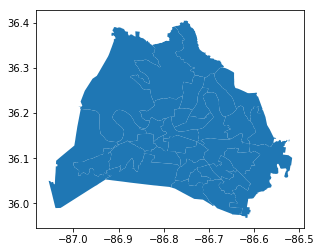

In [286]:
council_geo.plot()

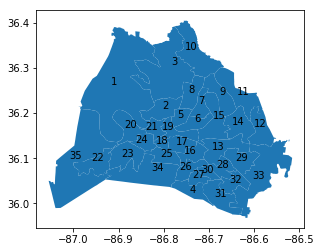

In [287]:
council_geo['coords'] = council_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
council_geo['coords'] = [coords[0] for coords in council_geo['coords']]
council_geo.plot()
for idx, row in council_geo.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center')

In [288]:
aff_merged = pd.merge(council_geo, aff_per_district, left_on = 'district', right_on = 'Council District')

In [289]:
aff_merged.drop(['district'], axis = 1, inplace = True)

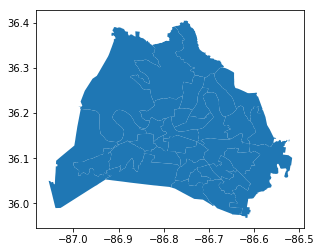

In [290]:
aff_merged.plot()

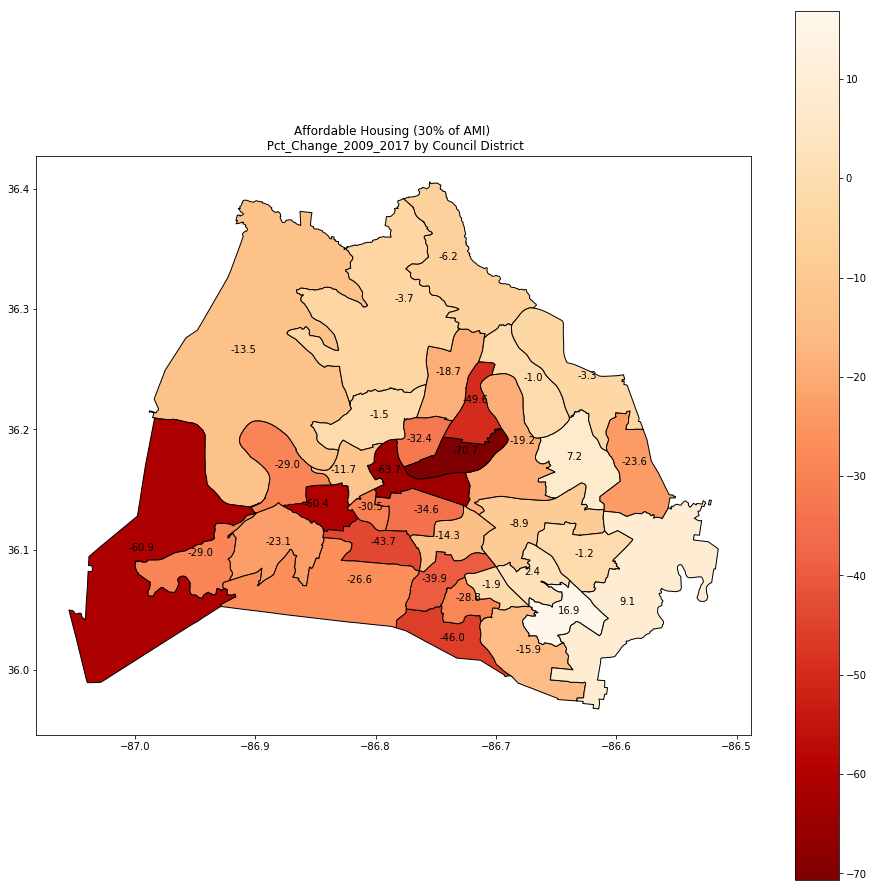

In [315]:
leg_kwds = {'title': 'Council District', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
aff_merged.plot(column = '%_Change_2009_2017', figsize=(16,16),cmap='OrRd_r', edgecolor = 'black',legend = True,legend_kwds = leg_kwds)
plt.title("Affordable Housing (30% of AMI) \n Pct_Change_2009_2017 by Council District")
for idx, row in aff_merged.iterrows():
    plt.annotate(s=row['%_Change_2009_2017'], xy=row['coords'],
                 horizontalalignment='center')


# leg_kwds = {'title': 'Council District', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
# aff_merged.plot(column = '2017 TOTAL APPR', figsize=(12,12), cmap='OrRd',edgecolor = 'black',legend = True,legend_kwds = leg_kwds)
# plt.title("Affordable housing 30% \n Pct_Change_2009_2017 by Council District")
# for idx, row in aff_merged.iterrows():
#     plt.annotate(s=row['Council District'], xy=row['coords'],
#                  horizontalalignment='center')

In [292]:
workforce_merged.sort_values('Pct_Change_2009_2017',ascending = False)

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry,coords,Council District,count_2009,count_2013,count_2017,Change_2009_2013,Change_2013_2017,Change_2009_2017,Pct_Change_2009_2013,Pct_Change_2013_2017,Pct_Change_2009_2017
12,Scott,scott.davis@nashville.gov,615-554-9730,615-862-6780,Davis,Council Member,5,(POLYGON ((-86.74724499986961 36.2104139998539...,"(-86.76393053246733, 36.18979200013818)",5.0,62,145,1887,83,1742,1825,133.870968,1201.379310,2943.548387
8,Mike,mike.freeman@nashville.gov,615-512-0121,615-862-6780,Freeman,Council Member,16,(POLYGON ((-86.71016199982391 36.1117320000543...,"(-86.74033498115041, 36.10911657938905)",16.0,29,32,673,3,641,644,10.344828,2003.125000,2220.689655
23,Mary Carolyn,marycarolyn.roberts@nashville.gov,615-977-9262,615-862-6780,Roberts,Council Member,20,(POLYGON ((-86.89685899975811 36.2070420002310...,"(-86.87294756573787, 36.16801949996336)",20.0,158,221,1959,63,1738,1801,39.873418,786.425339,1139.873418
20,Davette,davette.blalock@nashville.gov,615-831-5525,615-485-6563,Blalock,Council Member,27,(POLYGON ((-86.7188560001196 36.06792000026083...,"(-86.72300326735336, 36.05793349994057)",27.0,132,181,1381,49,1200,1249,37.121212,662.983425,946.212121
14,Anthony,anthony.davis@nashville.gov,615-775-8746,615-862-6780,Davis,Council Member,7,(POLYGON ((-86.71023799985292 36.2558440002726...,"(-86.71689836918614, 36.221721999959996)",7.0,368,641,3631,273,2990,3263,74.184783,466.458658,886.684783
27,Jason,jason.potts@nashville.gov,615-332-0568,615-491-6857,Potts,Council Member,30,(POLYGON ((-86.69655300007503 36.0805830001498...,"(-86.703478558412, 36.068063500173196)",30.0,21,22,134,1,112,113,4.761905,509.090909,538.095238
22,Karen Y.,karen.johnson@nashville.gov,615-977-6721,615-862-6780,Johnson,Council Member,29,(POLYGON ((-86.64000500015523 36.1225079999167...,"(-86.62650490960158, 36.09392099998708)",29.0,48,45,284,-3,239,236,-6.250000,531.111111,491.666667
6,Kevin,kevin.rhoten@nashville.gov,615-483-9535,615-862-6780,Rhoten,Council Member,14,(POLYGON ((-86.62832891700168 36.2161650929981...,"(-86.63475855793227, 36.17490299984186)",14.0,137,200,722,63,522,585,45.985401,261.000000,427.007299
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,(POLYGON ((-86.72850199989709 36.2832840002146...,"(-86.73924255649486, 36.24531199982642)",8.0,267,239,1205,-28,966,938,-10.486891,404.184100,351.310861
7,Jeff,jeff.syracuse@nashville.gov,615-886-9906,615-862-6780,Syracuse,Council Member,15,(POLYGON ((-86.66667799972338 36.1928009999973...,"(-86.67779491319368, 36.187882500169636)",15.0,392,447,1606,55,1159,1214,14.030612,259.284116,309.693878


In [293]:
workforce_merged.join(workforce_merged['Pct_Change_2009_2017'].apply(buckets), rsuffix='test')

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry,coords,Council District,count_2009,count_2013,count_2017,Change_2009_2013,Change_2013_2017,Change_2009_2017,Pct_Change_2009_2013,Pct_Change_2013_2017,Pct_Change_2009_2017,Pct_Change_2009_2017test
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...,"(-86.90970241884453, 36.26327799986527)",1.0,703,820,1470,117,650,767,16.642959,79.268293,109.103841,Moderate Increase
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,(POLYGON ((-86.75902399986667 36.2309080000732...,"(-86.79713738920347, 36.209998499786956)",2.0,103,106,372,3,266,269,2.912621,250.943396,261.165049,High Increase
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,(POLYGON ((-86.72850199989709 36.2832840002146...,"(-86.73924255649486, 36.24531199982642)",8.0,267,239,1205,-28,966,938,-10.486891,404.184100,351.310861,High Increase
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,(POLYGON ((-86.68680500011935 36.2867050001350...,"(-86.66879039599107, 36.24062099983553)",9.0,176,184,293,8,109,117,4.545455,59.239130,66.477273,Small Increase
4,Robert,robert.swope@nashville.gov,615-308-0577,615-862-6780,Swope,Council Member,4,(POLYGON ((-86.74488864807594 36.0531632050230...,"(-86.73590653419714, 36.02409350009242)",4.0,4539,4732,5316,193,584,777,4.252038,12.341505,17.118308,Small Increase
5,Holly,holly.huezo@nashville.gov,615-891-4517,615-862-6780,Huezo,Council Member,13,(POLYGON ((-86.62522200021607 36.1512449997383...,"(-86.68024482488488, 36.11868299999345)",13.0,249,153,634,-96,481,385,-38.554217,314.379085,154.618474,Moderate Increase
6,Kevin,kevin.rhoten@nashville.gov,615-483-9535,615-862-6780,Rhoten,Council Member,14,(POLYGON ((-86.62832891700168 36.2161650929981...,"(-86.63475855793227, 36.17490299984186)",14.0,137,200,722,63,522,585,45.985401,261.000000,427.007299,High Increase
7,Jeff,jeff.syracuse@nashville.gov,615-886-9906,615-862-6780,Syracuse,Council Member,15,(POLYGON ((-86.66667799972338 36.1928009999973...,"(-86.67779491319368, 36.187882500169636)",15.0,392,447,1606,55,1159,1214,14.030612,259.284116,309.693878,High Increase
8,Mike,mike.freeman@nashville.gov,615-512-0121,615-862-6780,Freeman,Council Member,16,(POLYGON ((-86.71016199982391 36.1117320000543...,"(-86.74033498115041, 36.10911657938905)",16.0,29,32,673,3,641,644,10.344828,2003.125000,2220.689655,Disproportionate Increase
9,Kathleen,kathleen.murphy@nashvlle.gov,615-828-4713,615-862-6780,Murphy,Council Member,24,(POLYGON ((-86.82774400027978 36.1543699997504...,"(-86.84939727074891, 36.135402500220565)",24.0,3052,2997,3339,-55,342,287,-1.802097,11.411411,9.403670,Small Increase


In [299]:
workforce_per_district.sort_values('Pct_Change_2009_2017',ascending = False).round(decimals=1)

,Council District,count_2009,count_2013,count_2017,Change_2009_2013,Change_2013_2017,Change_2009_2017,Pct_Change_2009_2013,Pct_Change_2013_2017,Pct_Change_2009_2017
4,5.0,62,145,1887,83,1742,1825,133.9,1201.4,2943.5
15,16.0,29,32,673,3,641,644,10.3,2003.1,2220.7
19,20.0,158,221,1959,63,1738,1801,39.9,786.4,1139.9
26,27.0,132,181,1381,49,1200,1249,37.1,663.0,946.2
6,7.0,368,641,3631,273,2990,3263,74.2,466.5,886.7
29,30.0,21,22,134,1,112,113,4.8,509.1,538.1
28,29.0,48,45,284,-3,239,236,-6.2,531.1,491.7
13,14.0,137,200,722,63,522,585,46.0,261.0,427.0
7,8.0,267,239,1205,-28,966,938,-10.5,404.2,351.3
14,15.0,392,447,1606,55,1159,1214,14.0,259.3,309.7


In [309]:
workforce_merged = workforce_merged.sort_values('Pct_Change_2009_2017',ascending = False).round(decimals=1)

In [298]:
workforce_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 19 columns):
first_name              35 non-null object
email                   35 non-null object
res_phone               34 non-null object
bus_phone               34 non-null object
last_name               35 non-null object
position                35 non-null object
district                35 non-null int64
geometry                35 non-null object
coords                  35 non-null object
Council District        35 non-null float64
count_2009              35 non-null int64
count_2013              35 non-null int64
count_2017              35 non-null int64
Change_2009_2013        35 non-null int64
Change_2013_2017        35 non-null int64
Change_2009_2017        35 non-null int64
Pct_Change_2009_2013    35 non-null float64
Pct_Change_2013_2017    35 non-null float64
Pct_Change_2009_2017    35 non-null float64
dtypes: float64(4), int64(7), object(8)
memory usage: 6.7+ KB


Disproportionate Increase
Disproportionate Increase
Disproportionate Increase
Disproportionate Increase
High Increase
High Increase
High Increase
High Increase
High Increase
High Increase
High Increase
High Increase
Moderate Increase
Moderate Increase
Moderate Increase
Moderate Increase
Moderate Increase
Moderate Increase
Moderate Increase
Moderate Increase
Moderate Increase
Small Increase
Small Increase
Small Increase
Small Increase
Small Increase
Small Increase
Small Increase
Small Increase
Small Increase
Small Increase
Percent Decrease
Percent Decrease
Percent Decrease
Percent Decrease


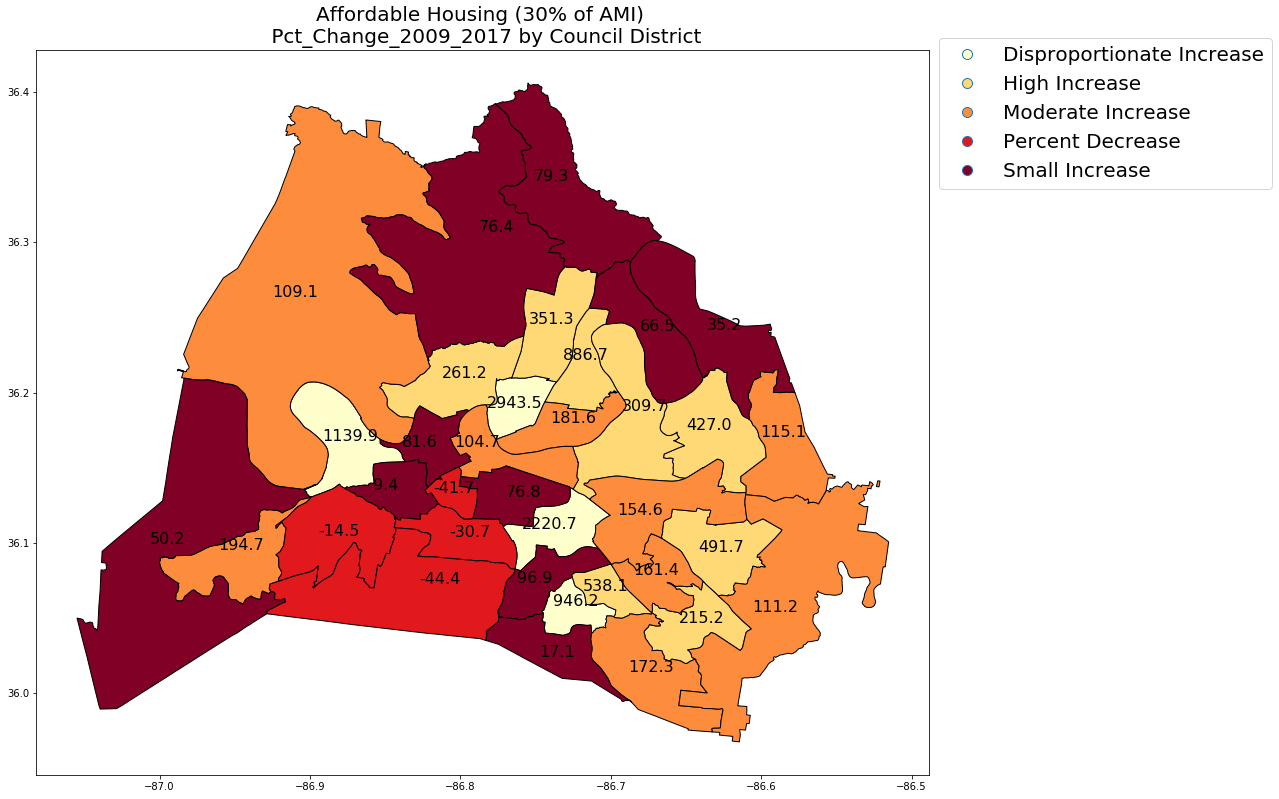

In [329]:
leg_kwds = {'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1, 'fontsize' : 20}
workforce_merged.plot(column = 'Buckets', figsize=(16,16),cmap='YlOrRd', edgecolor = 'black',legend = True,legend_kwds = leg_kwds)
plt.title("Affordable Housing (30% of AMI) \n Pct_Change_2009_2017 by Council District", fontsize=20)
for idx, row in workforce_merged.iterrows():
    print(row['Buckets'])
    plt.annotate(s=row['Pct_Change_2009_2017'], xy=row['coords'],
                 horizontalalignment='center', fontsize=16)



# Pct_Change_2009_2017


# leg_kwds = {'title': 'Council District', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
# workforce_merged.plot(column = 'Pct_Change_2009_2017', figsize=(16,16),cmap='YlOrRd', edgecolor = 'black',legend = True,legend_kwds = leg_kwds)
# plt.title("Workforce housing 30% \n Pct_Change_2009_2017 by Council District")
# for idx, row in aff_merged.iterrows():
#     plt.annotate(s=row['Pct_Change_2009_2017'], xy=row['coords'],
#                  horizontalalignment='center')

In [320]:
def buckets(x) :
    if x < 0: 
        return 'Percent Decrease'
    if x < 100:
        return 'Small Increase'
    if x < 200:
        return 'Moderate Increase'
    if x < 900: 
        return 'High Increase'
    return 'Disproportionate Increase'
workforce_merged['Buckets'] = workforce_merged['Pct_Change_2009_2017'].apply(buckets)
    

In [321]:
workforce_merged.columns

Index(['first_name', 'email', 'res_phone', 'bus_phone', 'last_name',
       'position', 'district', 'geometry', 'coords', 'Council District',
       'count_2009', 'count_2013', 'count_2017', 'Change_2009_2013',
       'Change_2013_2017', 'Change_2009_2017', 'Pct_Change_2009_2013',
       'Pct_Change_2013_2017', 'Pct_Change_2009_2017', 'Buckets'],
      dtype='object')

In [322]:
workforce_merged.head()

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry,coords,Council District,count_2009,count_2013,count_2017,Change_2009_2013,Change_2013_2017,Change_2009_2017,Pct_Change_2009_2013,Pct_Change_2013_2017,Pct_Change_2009_2017,Buckets
12,Scott,scott.davis@nashville.gov,615-554-9730,615-862-6780,Davis,Council Member,5,(POLYGON ((-86.74724499986961 36.2104139998539...,"(-86.76393053246733, 36.18979200013818)",5.0,62,145,1887,83,1742,1825,133.9,1201.4,2943.5,Disproportionate Increase
8,Mike,mike.freeman@nashville.gov,615-512-0121,615-862-6780,Freeman,Council Member,16,(POLYGON ((-86.71016199982391 36.1117320000543...,"(-86.74033498115041, 36.10911657938905)",16.0,29,32,673,3,641,644,10.3,2003.1,2220.7,Disproportionate Increase
23,Mary Carolyn,marycarolyn.roberts@nashville.gov,615-977-9262,615-862-6780,Roberts,Council Member,20,(POLYGON ((-86.89685899975811 36.2070420002310...,"(-86.87294756573787, 36.16801949996336)",20.0,158,221,1959,63,1738,1801,39.9,786.4,1139.9,Disproportionate Increase
20,Davette,davette.blalock@nashville.gov,615-831-5525,615-485-6563,Blalock,Council Member,27,(POLYGON ((-86.7188560001196 36.06792000026083...,"(-86.72300326735336, 36.05793349994057)",27.0,132,181,1381,49,1200,1249,37.1,663.0,946.2,Disproportionate Increase
14,Anthony,anthony.davis@nashville.gov,615-775-8746,615-862-6780,Davis,Council Member,7,(POLYGON ((-86.71023799985292 36.2558440002726...,"(-86.71689836918614, 36.221721999959996)",7.0,368,641,3631,273,2990,3263,74.2,466.5,886.7,High Increase
